In [1]:
import pandas as pd
# 엑셀 파일을 데이터프레임으로 변환
data = pd.read_excel('./대학기준.xlsx')

# 헤더 제거
data.columns = data.iloc[1]

# 필요 없는 데이터 전처리
data = data.drop(data.index[0:7]).reset_index(drop=True)

# 필요한 데이터 선택 후
datax = data.iloc[:, 1:34]

# 새로운 헤더 생성
new_header = ['school', 'student_number']

# 남자의 졸업 학생 수와
man_grad = datax.iloc[:, [4, 5]]
man_grad.columns = new_header

# 여자의 졸업학생 수를
woman_grad = datax.iloc[:, [4, 6]]
woman_grad.columns = new_header

# 학교를 기준으로 병합한다.
total_grad = pd.merge(man_grad, woman_grad, on='school')

# 전체 졸업생 수 계산
total_grad['student'] = total_grad['student_number_x'] + total_grad['student_number_y']

# 해외 취업자 학생 수를 위한 헤더 생성
new_header2 = ['school', 'foreign_job_student_number']

# 해외 취업한 남학생 수와
foreign_job_man = datax.iloc[:, [4, 9]]
foreign_job_man.columns = new_header2

# 해외 취업한 여학생 수 계산
foreign_job_woman = datax.iloc[:, [4, 10]]
foreign_job_woman.columns = new_header2

# 학교를 기준으로 병합
foreign_job_total = pd.merge(foreign_job_man, foreign_job_woman, on='school')

# 총 외국 취업한 학생 수 계산
foreign_job_total['foreign_job_student'] = foreign_job_total['foreign_job_student_number_x'] + foreign_job_total['foreign_job_student_number_y']

# 졸업생과 외국 취업한 학생 학교를 기준으로 병합
merged_df = pd.merge(total_grad, foreign_job_total, on='school')

# 실수형태로 변환 후
merged_df['student'] = merged_df['student'].astype(float)
merged_df['foreign_job_student'] = merged_df['foreign_job_student'].astype(float)

# 비율을 계산하고 내림차순으로 정렬
merged_df['rate'] = (merged_df['foreign_job_student'] / merged_df['student']) * 100
merged_df = merged_df.sort_values(by='rate', ascending=False)

result = merged_df[['school', 'student', 'foreign_job_student', 'rate']]

#result의 blank를 없앤다.
result['school'] = result['school'].str.strip()

#전체 졸업생 수 
total_grad_num=result['student'].sum()

#전체 해외 취업자 수
total_foreign_job=result['foreign_job_student'].sum()

#전체 학생의 해외 취업자 비율을 구한다.
total_rate=total_foreign_job/total_grad_num*100



#school 항목을 대학교 이름으로 정리
result2=result.sort_values(by='rate', ascending=False)
result2=result.head(10)
result2

C:\Users\Byung Mu Kang\AppData\Local\Temp\ipykernel_4140\3678222410.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['school'] = result['school'].str.strip()


,school,student,foreign_job_student,rate
91,부산외국어대학교,1630.0,48.0,2.944785
73,동서대학교,2271.0,58.0,2.553941
27,경성대학교,2768.0,40.0,1.445087
75,동아대학교,4268.0,53.0,1.241799
15,건국대학교(글로컬) _분교,1538.0,18.0,1.170351
88,부산가톨릭대학교,932.0,9.0,0.965665
49,금강대학교,104.0,1.0,0.961538
138,영산대학교 _제2캠퍼스,763.0,7.0,0.917431
172,중원대학교,769.0,7.0,0.910273
93,삼육대학교,1368.0,12.0,0.877193


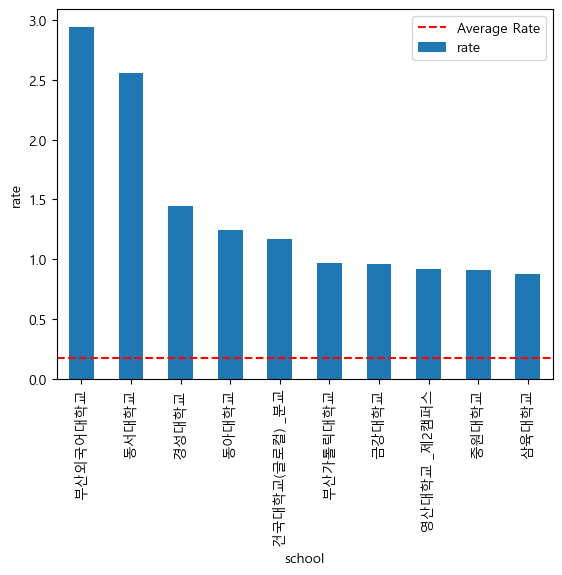

In [3]:
import matplotlib.pyplot as plt
#matplotlib으로 그래프 출력 
result2.plot(x='school',y='rate',kind='bar')
plt.xlabel('school')
plt.ylabel('rate')
plt.rc('font', family ='Malgun Gothic')
#전체 평균을 긋는다.
plt.axhline(total_rate, color='red', linestyle='--', label='Average Rate')
plt.legend()
plt.rc('font', family ='Malgun Gothic')
plt.show()

In [4]:
#입력 값의 대학의 비율 출력
college_name=input("찾고 싶은 대학교 이름: ")
answer = result.loc[result['school'] == college_name]
print(answer)

찾고 싶은 대학교 이름: 서강대학교
   school  student  foreign_job_student      rate
97  서강대학교   1818.0                  8.0  0.440044


C:\Users\Byung Mu Kang\AppData\Local\Temp\ipykernel_4140\39089425.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seoul_result=seoul_result.append(result.loc[result['school']==s],ignore_index=True)


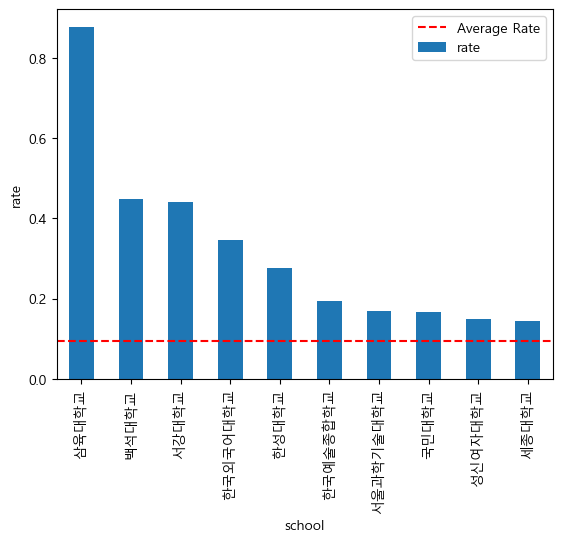

In [5]:
#서울에 있는 대학교의 목록 
seoul=["서울과학기술대학교","서울교육대학교","서울대학교","육군사관학교","한국과학기술원","한국예술종합학교","한국체육대학교","한국방송통신대학교","서울시립대학교","가톨릭대학교","강서대학교","감리교신학대학교","건국대학교","경기대학교","경희대학교","고려대학교","광운대학교","국민대학교","덕성여자대학교","동국대학교","동덕여자대학교","명지대학교","백석대학교","삼육대학교","상명대학교","서강대학교","서경대학교","서울기독대학교","서울여자대학교","서울한영대학교","성공회대학교","성균관대학교","성신여자대학교","세종대학교","숙명여자대학교","숭실대학교","연세대학교","이화여자대학교","장로회신학대학교","정석대학","중앙대학교","총신대학교","추계예술대학교","한국성서대학교","한국외국어대학교","한성대학교","한신대학교","한양대학교","호서대학교","홍익대학교"]
seoul_result=pd.DataFrame()
#서울에 있는 대학교의 결과를 seoul_result에 추가 
for s in seoul:
    seoul_result=seoul_result.append(result.loc[result['school']==s],ignore_index=True)
#서울에 있는 대학들의 평균 값
seoul_result=seoul_result.sort_values(by='rate', ascending=False)
seoul_rate_avg=seoul_result['rate'].mean()

seoul_result=seoul_result.head(10)
seoul_result.plot(x='school',y='rate',kind='bar')
plt.xlabel('school')
plt.ylabel('rate')
plt.axhline(seoul_rate_avg, color='red', linestyle='--', label='Average Rate')
plt.legend()
plt.rc('font', family ='Malgun Gothic')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


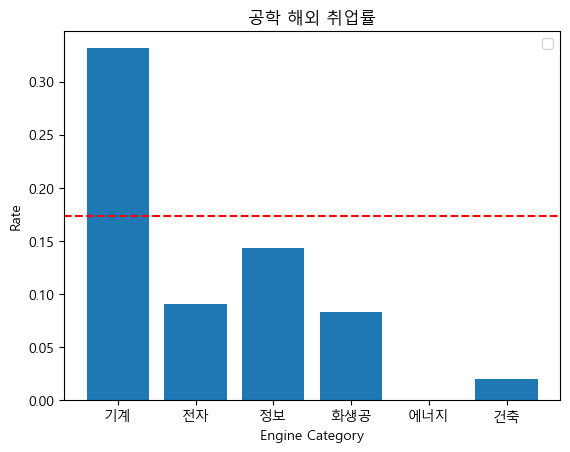

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# 엑셀 파일을 데이터프레임으로 변환
data = pd.read_excel('./공학계열.xlsx')
#필요한 데이터만 전처리
data.columns = data.iloc[1]
data = data.drop(data.index[0:7]).reset_index(drop=True)
data = data.iloc[:, [7,10,11,14,15]]
data['student'] = data.iloc[:, 1] + data.iloc[:, 2]
data['foreign_job']=data.iloc[:,3] + data.iloc[:,4]
data=data.iloc[:,[0,5,6]]
data['rate']=data.iloc[:,2]/data.iloc[:,1]*100
#새로운 헤더 생성 후 대입
new_header = ['class', 'student','foreign_job','rate']
data.columns = new_header
#학과명의 white space 정리
data['class'] = data['class'].str.strip()
#학과 명을 기계, 전자, 정보, 화생공, 에너지, 건축 계열로 분리
machine = data[data['class'].str.contains('기계')]
elec = data[data['class'].str.contains('전기|전자')]
info = data[data['class'].str.contains('정보|컴퓨터')]
biochem = data[data['class'].str.contains('화학|생물|생명')]
energy = data[data['class'].str.contains('에너지')]
arch = data[data['class'].str.contains('건축|토목|조경')]
#각 학과의 해외취업자 수를 졸업자 수로 나누어서 해외 취업률을 구한다.
machine_rate=machine['foreign_job'].sum()/machine['student'].sum()*100
elec_rate=elec['foreign_job'].sum()/elec['student'].sum()*100
info_rate=info['foreign_job'].sum()/info['student'].sum()*100
biochem_rate=biochem['foreign_job'].sum()/biochem['student'].sum()*100
energy_rate=energy['foreign_job'].sum()/energy['student'].sum()*100
arch_rate=arch['foreign_job'].sum()/arch['student'].sum()*100
#전체 공대의 해외 취업률을 전체 졸업자수와 해외 취업자수로 비율을 구한다.
total_engine=machine['student'].sum()+elec['student'].sum()+info['student'].sum()+biochem['student'].sum()+energy['student'].sum()+arch['student'].sum()
total_engine_for=data['foreign_job'].sum()
total_rate_engine=total_engine_for/total_engine*100
#각 학과 별로 평균 취업률을 구한 후 하나의 dictionary로 만든다.
engine_job={'기계':machine_rate,'전자':elec_rate,'정보':info_rate,'화생공':biochem_rate,'에너지':energy_rate,'건축':arch_rate}
categories = list(engine_job.keys())
rates = list(engine_job.values())
#matplotlib으로 그래프 출력 
plt.rc('font', family ='Malgun Gothic')
plt.bar(categories, rates)
plt.xlabel('Engine Category')
plt.ylabel('Rate')
plt.title('공학 해외 취업률')
plt.legend()
#전체 평균을 긋는다.
plt.axhline(total_rate_engine, color='red', linestyle='--', label='Average Rate')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


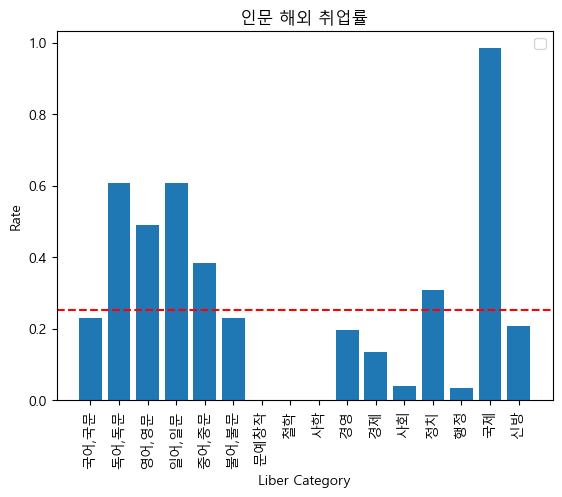

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# 엑셀 파일을 데이터프레임으로 변환
data = pd.read_excel('./인문계열.xlsx')
#위와 동일한 방법으로 인문계열의 각 학과 별 취업률을 구한다.
data.columns = data.iloc[1]
data = data.drop(data.index[0:7]).reset_index(drop=True)
data = data.iloc[:, [7,10,11,14,15]]
data['student'] = data.iloc[:, 1] + data.iloc[:, 2]
data['foreign_job']=data.iloc[:,3] + data.iloc[:,4]
data=data.iloc[:,[0,5,6]]
data['rate']=data.iloc[:,2]/data.iloc[:,1]*100
new_header = ['class', 'student','foreign_job','rate']
data.columns = new_header
data['class'] = data['class'].str.strip()

korea = data[data['class'].str.contains('국어')]
german = data[data['class'].str.contains('독어|독일')]
eng = data[data['class'].str.contains('영어|영문|영미')]
japan = data[data['class'].str.contains('일본|일어|일문')]
china = data[data['class'].str.contains('중어|중국|중문')]
fran = data[data['class'].str.contains('불어|불문|프랑스')]
liter = data[data['class'].str.contains('문예')]
phil = data[data['class'].str.contains('철학')]
hist = data[data['class'].str.contains('사학')]
mang = data[data['class'].str.contains('경영')]
econ = data[data['class'].str.contains('경제')]
soc = data[data['class'].str.contains('사회')]
pol = data[data['class'].str.contains('정치')]
p_admin = data[data['class'].str.contains('행정')]
inter = data[data['class'].str.contains('국제')]
comm = data[data['class'].str.contains('언론|미디어|커뮤니케이션')]

total_liber=data['student'].sum()
total_liber_for=data['foreign_job'].sum()
total_liber_rate=total_liber_for/total_liber*100

korea_rate=korea['foreign_job'].sum()/korea['student'].sum()*100
german_rate=german['foreign_job'].sum()/german['student'].sum()*100
eng_rate=eng['foreign_job'].sum()/eng['student'].sum()*100
japan_rate=japan['foreign_job'].sum()/japan['student'].sum()*100
china_rate=china['foreign_job'].sum()/china['student'].sum()*100
fran_rate=fran['foreign_job'].sum()/fran['student'].sum()*100
liter_rate=liter['foreign_job'].sum()/liter['student'].sum()*100
phil_rate=phil['foreign_job'].sum()/phil['student'].sum()*100
hist_rate=hist['foreign_job'].sum()/hist['student'].sum()*100
mang_rate=mang['foreign_job'].sum()/mang['student'].sum()*100
econ_rate=econ['foreign_job'].sum()/econ['student'].sum()*100
soc_rate=soc['foreign_job'].sum()/soc['student'].sum()*100
pol_rate=pol['foreign_job'].sum()/pol['student'].sum()*100
p_admin_rate=p_admin['foreign_job'].sum()/p_admin['student'].sum()*100
inter_rate=inter['foreign_job'].sum()/inter['student'].sum()*100
comm_rate=comm['foreign_job'].sum()/comm['student'].sum()*100

liber_job={'국어,국문':korea_rate,'독어,독문':german_rate,'영어,영문':eng_rate,'일어,일문':japan_rate,'중어,중문':china_rate,'불어,불문':fran_rate,
      '문예창작':liter_rate,'철학':phil_rate,'사학':hist_rate,'경영':mang_rate,'경제':econ_rate,'사회':soc_rate,'정치':pol_rate,
      '행정':p_admin_rate,'국제':inter_rate,'신방':comm_rate}
categories = list(liber_job.keys())
rates = list(liber_job.values())

#matplotlib으로 그래프 출력 
plt.rc('font', family ='Malgun Gothic')
plt.bar(categories, rates)
plt.xlabel('Liber Category')
plt.ylabel('Rate')
plt.title('인문 해외 취업률')
plt.legend()

#글자 수가 많아서 보이지 않기 때문에 x축을 90도 회전
plt.xticks(rotation=90)

# Add a line for the average rate
plt.axhline(total_liber_rate, color='red', linestyle='--', label='Average Rate')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


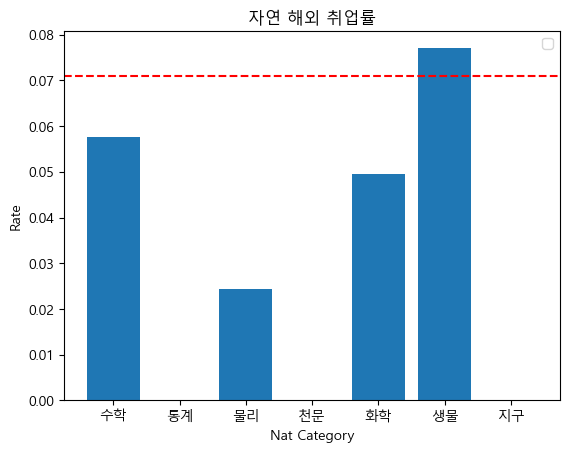

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일을 데이터프레임으로 변환
data = pd.read_excel('./자연계열.xlsx')
data.columns = data.iloc[1]
data = data.drop(data.index[0:7]).reset_index(drop=True)
data = data.iloc[:, [7,10,11,14,15]]
data['student'] = data.iloc[:, 1] + data.iloc[:, 2]
data['foreign_job'] = data.iloc[:,3] + data.iloc[:,4]
data = data.iloc[:,[0,5,6]]
data['rate'] = data.iloc[:,2] / data.iloc[:,1] * 100
new_header = ['class', 'student', 'foreign_job', 'rate']
data.columns = new_header

data['class'] = data['class'].str.strip()
total_nat = data['student'].sum()
total_nat_for = data['foreign_job'].sum()
total_nat_rate = total_nat_for / total_nat * 100

mat = data[data['class'].str.contains('수학')]
stat = data[data['class'].str.contains('통계')]
phy = data[data['class'].str.contains('물리')]
ast = data[data['class'].str.contains('천문')]
chem = data[data['class'].str.contains('화학')]
bio = data[data['class'].str.contains('생명|생물')]
ear = data[data['class'].str.contains('지구')]

mat_rate = mat['foreign_job'].sum() / mat['student'].sum() * 100
stat_rate = stat['foreign_job'].sum() / stat['student'].sum() * 100
phy_rate = phy['foreign_job'].sum() / phy['student'].sum() * 100
ast_rate = ast['foreign_job'].sum() / ast['student'].sum() * 100
chem_rate = chem['foreign_job'].sum() / chem['student'].sum() * 100
bio_rate = bio['foreign_job'].sum() / bio['student'].sum() * 100
ear_rate = ear['foreign_job'].sum() / ear['student'].sum() * 100

nat_job={'수학':mat_rate,'통계':stat_rate,'물리':phy_rate,'천문':ast_rate,'화학':chem_rate,'생물':bio_rate,'지구':ear_rate}
categories = list(nat_job.keys())
rates = list(nat_job.values())

#matplotlib으로 그래프 출력 
plt.rc('font', family ='Malgun Gothic')
plt.bar(categories, rates)
plt.xlabel('Nat Category')
plt.ylabel('Rate')
plt.title('자연 해외 취업률')
plt.legend()
plt.axhline(total_nat_rate, color='red', linestyle='--', label='Average Rate')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


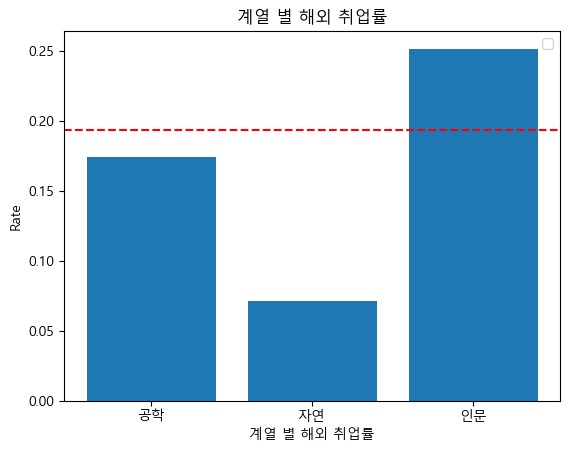

In [13]:
total_final=total_engine+total_liber+total_nat
total_final_for=total_engine_for+total_liber_for+total_nat_for
total_final_rate_job=total_final_for/total_final*100
final={'공학':total_rate_engine,'자연':total_nat_rate,'인문':total_liber_rate}
categories = list(final.keys())
rates = list(final.values())
plt.rc('font', family ='Malgun Gothic')
plt.bar(categories, rates)
plt.xlabel('계열 별 해외 취업률')
plt.ylabel('Rate')
plt.title('계열 별 해외 취업률')
plt.legend()
plt.axhline(total_final_rate_job, color='red', linestyle='--', label='Average Rate')
plt.show()

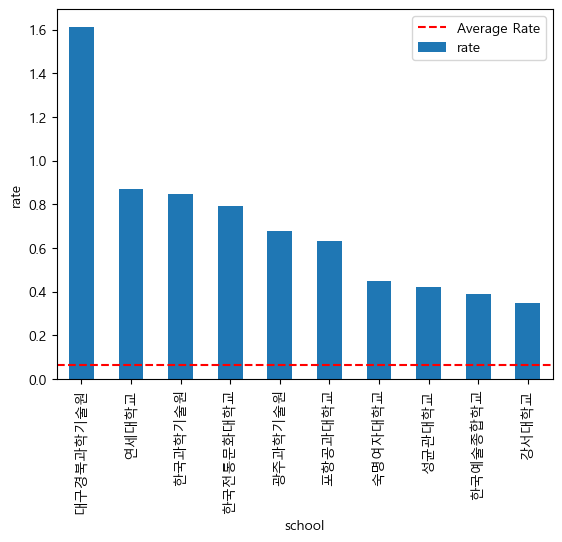

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# 엑셀 파일을 데이터프레임으로 변환
data = pd.read_excel('./대학별 대학원.xlsx')
#필요한 데이터만 전처리
data.columns = data.iloc[1]
data = data.drop(data.index[0:6]).reset_index(drop=True)
data = data.iloc[:, [5,6,7,16,17,18,19,20,21]]
#전체 학생수와 해외 대학원 진학한 학생 수 계산
data['student']=data.iloc[:,1]+data.iloc[:,2]
data['foreign_school']=data.iloc[:,3]+data.iloc[:,4]+data.iloc[:,5]+data.iloc[:,6]+data.iloc[:,7]+data.iloc[:,8]
data=data.iloc[:,[0,9,10]]
#새로운 헤더 생성 후 적용
new_header=['school','student','foreign_school']
data.columns=new_header
#학교 이름들에 있는 white space 제거
data['school'] = data['school'].str.strip()
#전체 학생 수와 대학원 진학 비율 구하기 
total_students=data['student'].sum()
total_for=data['foreign_school'].sum()
total_rate=total_for/total_students*100
#각 학교 별로 해외 대학원 진학 비율 구하기 
data['rate'] = (data['foreign_school'] / data['student']) * 100
#대학원 진학 비율이 높은 순서대로 정렬 
data = data.sort_values(by='rate', ascending=False)
top_schools=data.head(10)
plt.rc('font', family ='Malgun Gothic')
top_schools.plot(x='school',y='rate',kind='bar')
plt.xlabel('school')
plt.ylabel('rate')
plt.axhline(total_rate, color='red', linestyle='--', label='Average Rate')
plt.rc('font', family ='Malgun Gothic')
plt.legend()
plt.show()

In [15]:
#찾고 싶은 대학교를 이름으로 받은 후, 출력
college_name=input("찾고 싶은 대학교 이름: ")
answer = data.loc[data['school'] == college_name]
print(answer)

찾고 싶은 대학교 이름: 서강대학교
   school student foreign_school      rate
97  서강대학교    1818              6  0.330033


C:\Users\Byung Mu Kang\AppData\Local\Temp\ipykernel_4140\3579485472.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  seoul_result=seoul_result.append(data.loc[data['school']==s],ignore_index=True)


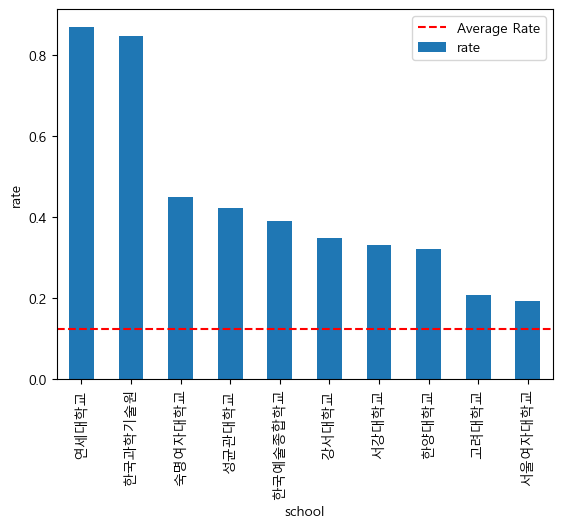

In [16]:
#서울에 있는 대학교의 목록 
seoul=["서울과학기술대학교","서울교육대학교","서울대학교","육군사관학교","한국과학기술원","한국예술종합학교","한국체육대학교","한국방송통신대학교","서울시립대학교","가톨릭대학교","강서대학교","감리교신학대학교","건국대학교","경기대학교","경희대학교","고려대학교","광운대학교","국민대학교","덕성여자대학교","동국대학교","동덕여자대학교","명지대학교","백석대학교","삼육대학교","상명대학교","서강대학교","서경대학교","서울기독대학교","서울여자대학교","서울한영대학교","성공회대학교","성균관대학교","성신여자대학교","세종대학교","숙명여자대학교","숭실대학교","연세대학교","이화여자대학교","장로회신학대학교","정석대학","중앙대학교","총신대학교","추계예술대학교","한국성서대학교","한국외국어대학교","한성대학교","한신대학교","한양대학교","호서대학교","홍익대학교"]
seoul_result=pd.DataFrame()
#서울에 있는 대학교의 결과를 seoul_result에 추가 
for s in seoul:
    seoul_result=seoul_result.append(data.loc[data['school']==s],ignore_index=True)
#서울에 있는 대학들의 평균 값
seoul_result=seoul_result.sort_values(by='rate', ascending=False)
seoul_rate_avg=seoul_result['rate'].mean()

seoul_result=seoul_result.head(10)
seoul_result.plot(x='school',y='rate',kind='bar')
plt.xlabel('school')
plt.ylabel('rate')
plt.axhline(seoul_rate_avg, color='red', linestyle='--', label='Average Rate')
plt.legend()
plt.rc('font', family ='Malgun Gothic')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


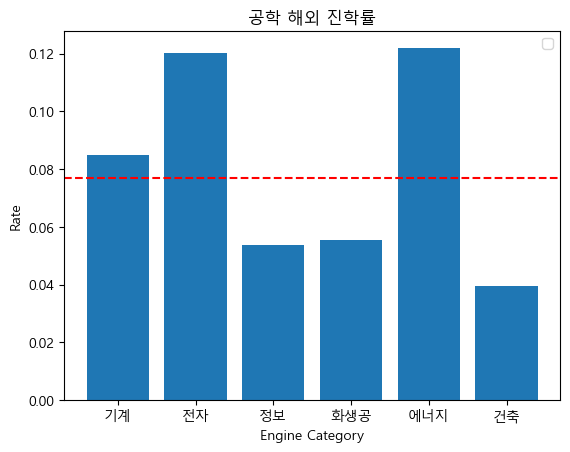

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# 엑셀 파일을 데이터프레임으로 변환
data = pd.read_excel('./공학 대학원.xlsx')
#필요한 데이터만 전처리
data = data.drop(data.index[0:6]).reset_index(drop=True)
data = data.iloc[:, [5,6,9,10,19,20,21,22,23,24]]
data['student']=data.iloc[:,2]+data.iloc[:,3]
data['foreign_school']=data.iloc[:,4]+data.iloc[:,5]+data.iloc[:,6]+data.iloc[:,7]+data.iloc[:,8]+data.iloc[:,9]
data=data.iloc[:,[1,10,11]]
data['rate']=data.iloc[:,2]/data.iloc[:,1]*100
total_engine_student=data['student'].sum()
total_engine_for=data['foreign_school'].sum()
total_rate_engine=total_engine_for/total_engine_student*100
#새로운 헤더 생성 후 대입
new_header = ['class', 'student','foreign_school','rate']
data.columns = new_header
#학과명의 white space 정리
data['class'] = data['class'].str.strip()
#학과 명을 기계, 전자, 정보, 화생공, 에너지, 건축 계열로 분리
machine = data[data['class'].str.contains('기계')]
elec = data[data['class'].str.contains('전기|전자')]
info = data[data['class'].str.contains('정보|컴퓨터')]
biochem = data[data['class'].str.contains('화학|생물|생명')]
energy = data[data['class'].str.contains('에너지')]
arch = data[data['class'].str.contains('건축|토목|조경')]
#각 학과의 해외취업자 수를 졸업자 수로 나누어서 해외 취업률을 구한다.
machine_rate=machine['foreign_school'].sum()/machine['student'].sum()*100
elec_rate=elec['foreign_school'].sum()/elec['student'].sum()*100
info_rate=info['foreign_school'].sum()/info['student'].sum()*100
biochem_rate=biochem['foreign_school'].sum()/biochem['student'].sum()*100
energy_rate=energy['foreign_school'].sum()/energy['student'].sum()*100
arch_rate=arch['foreign_school'].sum()/arch['student'].sum()*100
#전체 공대의 해외 취업률을 전체 졸업자수와 해외 취업자수로 비율을 구한다.
total_engine=machine['student'].sum()+elec['student'].sum()+info['student'].sum()+biochem['student'].sum()+energy['student'].sum()+arch['student'].sum()
total_engine_for=data['foreign_school'].sum()
#각 학과 별로 평균 취업률을 구한 후 하나의 dictionary로 만든다.
engine_school={'기계':machine_rate,'전자':elec_rate,'정보':info_rate,'화생공':biochem_rate,'에너지':energy_rate,'건축':arch_rate}
categories = list(engine_school.keys())
rates = list(engine_school.values())
#matplotlib으로 그래프 출력 
plt.rc('font', family ='Malgun Gothic')
plt.bar(categories, rates)
plt.xlabel('Engine Category')
plt.ylabel('Rate')
plt.title('공학 해외 진학률')
plt.legend()
#전체 평균을 긋는다.
plt.axhline(total_rate_engine, color='red', linestyle='--', label='Average Rate')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


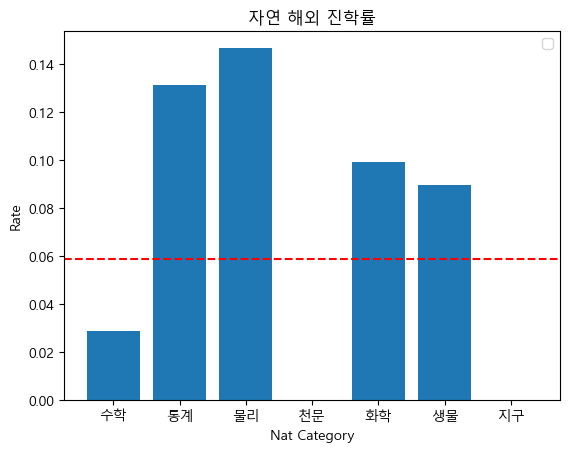

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# 엑셀 파일을 데이터프레임으로 변환
data = pd.read_excel('./자연 대학원.xlsx')
#필요한 데이터만 전처리
data = data.drop(data.index[0:6]).reset_index(drop=True)
data = data.iloc[:, [5,6,9,10,19,20,21,22,23,24]]
data['student']=data.iloc[:,2]+data.iloc[:,3]
data['foreign_school']=data.iloc[:,4]+data.iloc[:,5]+data.iloc[:,6]+data.iloc[:,7]+data.iloc[:,8]+data.iloc[:,9]
data=data.iloc[:,[1,10,11]]
data['rate']=data.iloc[:,2]/data.iloc[:,1]*100
total_nat_student=data['student'].sum()
total_nat_for=data['foreign_school'].sum()
total_rate_nat=total_nat_for/total_nat_student*100
#새로운 헤더 생성 후 대입
new_header = ['class', 'student','foreign_school','rate']
data.columns = new_header
#학과명의 white space 정리
data['class'] = data['class'].str.strip()
mat = data[data['class'].str.contains('수학')]
stat = data[data['class'].str.contains('통계')]
phy = data[data['class'].str.contains('물리')]
ast = data[data['class'].str.contains('천문')]
chem = data[data['class'].str.contains('화학')]
bio = data[data['class'].str.contains('생명|생물')]
ear = data[data['class'].str.contains('지구')]

mat_rate = mat['foreign_school'].sum() / mat['student'].sum() * 100
stat_rate = stat['foreign_school'].sum() / stat['student'].sum() * 100
phy_rate = phy['foreign_school'].sum() / phy['student'].sum() * 100
ast_rate = ast['foreign_school'].sum() / ast['student'].sum() * 100
chem_rate = chem['foreign_school'].sum() / chem['student'].sum() * 100
bio_rate = bio['foreign_school'].sum() / bio['student'].sum() * 100
ear_rate = ear['foreign_school'].sum() / ear['student'].sum() * 100

nat_school={'수학':mat_rate,'통계':stat_rate,'물리':phy_rate,'천문':ast_rate,'화학':chem_rate,'생물':bio_rate,'지구':ear_rate}
categories = list(nat_school.keys())
rates = list(nat_school.values())

#matplotlib으로 그래프 출력 
plt.rc('font', family ='Malgun Gothic')
plt.bar(categories, rates)
plt.xlabel('Nat Category')
plt.ylabel('Rate')
plt.title('자연 해외 진학률')
plt.legend()
plt.axhline(total_rate_nat, color='red', linestyle='--', label='Average Rate')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


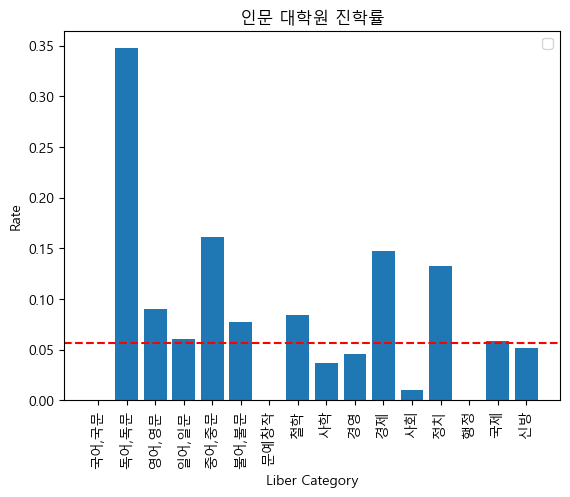

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
# 엑셀 파일을 데이터프레임으로 변환
data = pd.read_excel('./인문 대학원.xlsx')
#필요한 데이터만 전처리
data = data.drop(data.index[0:6]).reset_index(drop=True)
data = data.iloc[:, [5,6,9,10,19,20,21,22,23,24]]
data['student']=data.iloc[:,2]+data.iloc[:,3]
data['foreign_school']=data.iloc[:,4]+data.iloc[:,5]+data.iloc[:,6]+data.iloc[:,7]+data.iloc[:,8]+data.iloc[:,9]
data=data.iloc[:,[1,10,11]]
data['rate']=data.iloc[:,2]/data.iloc[:,1]*100
total_liber_student=data['student'].sum()
total_liber_for=data['foreign_school'].sum()
total_rate_nat=total_liber_for/total_liber_student*100
#새로운 헤더 생성 후 대입
new_header = ['class', 'student','foreign_school','rate']
data.columns = new_header
#학과명의 white space 정리
data['class'] = data['class'].str.strip()
korea = data[data['class'].str.contains('국어')]
german = data[data['class'].str.contains('독어|독일')]
eng = data[data['class'].str.contains('영어|영문|영미')]
japan = data[data['class'].str.contains('일본|일어|일문')]
china = data[data['class'].str.contains('중어|중국|중문')]
fran = data[data['class'].str.contains('불어|불문|프랑스')]
liter = data[data['class'].str.contains('문예')]
phil = data[data['class'].str.contains('철학')]
hist = data[data['class'].str.contains('사학')]
mang = data[data['class'].str.contains('경영')]
econ = data[data['class'].str.contains('경제')]
soc = data[data['class'].str.contains('사회')]
pol = data[data['class'].str.contains('정치')]
p_admin = data[data['class'].str.contains('행정')]
inter = data[data['class'].str.contains('국제')]
comm = data[data['class'].str.contains('언론|미디어|커뮤니케이션')]

total_liber=data['student'].sum()
total_liber_for=data['foreign_school'].sum()
total_liber_rate=total_liber_for/total_liber*100

korea_rate=korea['foreign_school'].sum()/korea['student'].sum()*100
german_rate=german['foreign_school'].sum()/german['student'].sum()*100
eng_rate=eng['foreign_school'].sum()/eng['student'].sum()*100
japan_rate=japan['foreign_school'].sum()/japan['student'].sum()*100
china_rate=china['foreign_school'].sum()/china['student'].sum()*100
fran_rate=fran['foreign_school'].sum()/fran['student'].sum()*100
liter_rate=liter['foreign_school'].sum()/liter['student'].sum()*100
phil_rate=phil['foreign_school'].sum()/phil['student'].sum()*100
hist_rate=hist['foreign_school'].sum()/hist['student'].sum()*100
mang_rate=mang['foreign_school'].sum()/mang['student'].sum()*100
econ_rate=econ['foreign_school'].sum()/econ['student'].sum()*100
soc_rate=soc['foreign_school'].sum()/soc['student'].sum()*100
pol_rate=pol['foreign_school'].sum()/pol['student'].sum()*100
p_admin_rate=p_admin['foreign_school'].sum()/p_admin['student'].sum()*100
inter_rate=inter['foreign_school'].sum()/inter['student'].sum()*100
comm_rate=comm['foreign_school'].sum()/comm['student'].sum()*100

liber_school={'국어,국문':korea_rate,'독어,독문':german_rate,'영어,영문':eng_rate,'일어,일문':japan_rate,'중어,중문':china_rate,'불어,불문':fran_rate,
      '문예창작':liter_rate,'철학':phil_rate,'사학':hist_rate,'경영':mang_rate,'경제':econ_rate,'사회':soc_rate,'정치':pol_rate,
      '행정':p_admin_rate,'국제':inter_rate,'신방':comm_rate}
categories = list(liber_school.keys())
rates = list(liber_school.values())

#matplotlib으로 그래프 출력 
plt.rc('font', family ='Malgun Gothic')
plt.bar(categories, rates)
plt.xlabel('Liber Category')
plt.ylabel('Rate')
plt.title('인문 대학원 진학률')
plt.legend()

#글자 수가 많아서 보이지 않기 때문에 x축을 90도 회전
plt.xticks(rotation=90)

# Add a line for the average rate
plt.axhline(total_liber_rate, color='red', linestyle='--', label='Average Rate')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


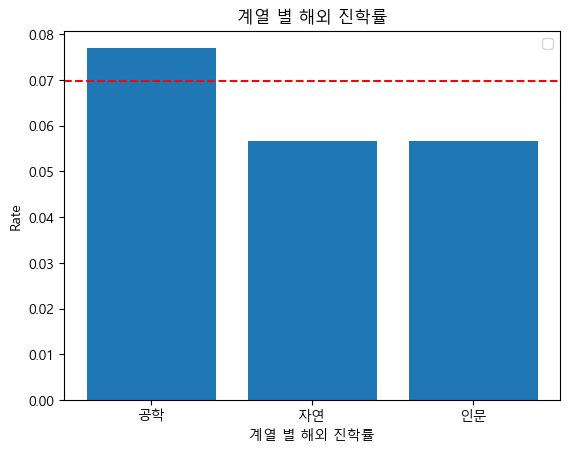

In [20]:
#전체 학생수와 전체 해외 기업 취업률과 해외 대학원 진학률을 더해서 해외에 가는 비율을 구한다.
total_final=total_engine+total_liber+total_nat_student
total_final_for=total_engine_for+total_liber_for+total_nat_for
total_final_rate_school=total_final_for/total_final*100
#계열 별로 구분
final={'공학':total_rate_engine,'자연':total_rate_nat,'인문':total_liber_rate}
categories = list(final.keys())
rates = list(final.values())
plt.rc('font', family ='Malgun Gothic')
plt.bar(categories, rates)
plt.xlabel('계열 별 해외 진학률')
plt.ylabel('Rate')
plt.title('계열 별 해외 진학률')
plt.legend()
plt.axhline(total_final_rate_school, color='red', linestyle='--', label='Average Rate')
plt.show()

In [21]:
#각 과별로 해외 기업 취업률과 해외 대학원 진학률을 더한다.
foreign_rate=total_final_rate_school+total_final_rate_job
foreign_engine={}
for key in engine_job:
    if key in engine_school:
        foreign_engine[key] = engine_job[key] + engine_school[key]
foreign_nat={}
for key in nat_job:
    if key in nat_school:
        foreign_nat[key] = nat_job[key] + nat_school[key]
foreign_liber={}
for key in liber_job:
    if key in liber_school:
        foreign_liber[key] = liber_job[key] + liber_school[key]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


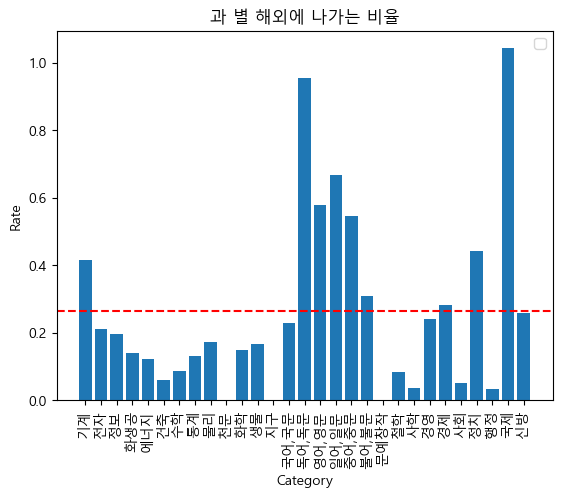

In [22]:
final_result={}
final_result.update(foreign_engine)
final_result.update(foreign_nat)
final_result.update(foreign_liber)
categories = list(final_result.keys())
rates = list(final_result.values())

#matplotlib으로 그래프 출력 
plt.rc('font', family ='Malgun Gothic')
plt.bar(categories, rates)
plt.xlabel('Category')
plt.ylabel('Rate')
plt.title('과 별 해외에 나가는 비율')
plt.legend()

#글자 수가 많아서 보이지 않기 때문에 x축을 90도 회전
plt.xticks(rotation=90)

# Add a line for the average rate
plt.axhline(foreign_rate, color='red', linestyle='--', label='Average Rate')

plt.show()